# Origins and evolutions of names in France
## Introduction
### Dataset 
This project is once again part of the Open Data initiative. This time, we will analyze two datasets together:

1.​ A national data file containing the first names given to children born in France (excluding Mayotte) between 1900 and 2018 and the number of children of each gender associated with each first name. The data is classified by department. The file contains 3.5 million lines. The file is available at [this address](https://www.data.gouv.fr/fr/datasets/ficher-des-prenoms-de-1900-a-2018/).

2.​ [A second dataset](https://www.behindthename.com/ ) from Mike Campbell's work on his website “Behind the Name.”
> <span style='color:gray'> _Behind the Name is a website for learning about all aspects of given names. Its scope is broad: all given names from all cultures and periods are eligible to be included in the main name database. Names from mythology and fiction are also eligible. There are currently 22874 names in the database, a fraction of what the scope entails. There's still much work to be done._ </span>

The database from this site is also available at data.gouv.fr and includes several fields, including the origins of first names! The database from this site is available at [this address](https://www.data.gouv.fr/fr/datasets/liste-de-prenoms/)
/

Mike Campbell is a software designer and information architect based in Victoria, British Columbia, Canada:
- An [interview](https://nameberry.com/blog/behind-the-namer).
- If you would like to [speak with him (LinkedIn)](https://www.linkedin.com/in/mike-campbell-218b8124/).

### Context

The analysis of first names is nothing new in itself; in fact, it is a classic: analysis of instant popularity, history, “gender change” of first names, etc. Here are two examples of links that have reused this first dataset:
- “analysis” type of use (evolution over time, etc.):\
https://www.lefigaro.fr/fig-data/prenoms/
- "leaderboard" of popularity: Insee :\
https://www.insee.fr/fr/statistiques/3532172

## Retrieving data

In [3]:
import pandas as pd

# 'Behind the name data' file
df_btn = pd.read_csv("../data/Prenoms.csv", sep=";", header=0, encoding='ISO-8859-1')
df_btn = df_btn.rename(columns={"01_prenom": "prenom", "02_genre": "genre", "03_langage":"langage", "04_fréquence":"frequence"})
df_btn

,prenom,genre,langage,frequence
0,aaliyah,f,english (modern),0.0
1,aapeli,m,finnish,0.0
2,aapo,m,finnish,0.0
3,aaren,"m,f",english,0.0
4,aarne,m,finnish,0.0
...,...,...,...,...
11622,zvi,m,jewish,0.1
11623,zvonimir,m,croatian,0.0
11624,zvonimira,f,croatian,0.0
11625,zvonko,m,croatian,0.0


In [62]:
# French national data file
df_fr_raw = pd.read_csv("../data/dpt2018.csv", sep=";", header=0)

# Removing lines with unknown year
df_fr = df_fr_raw[df_fr_raw.annais!='XXXX']
df_fr[df_fr.preusuel.str.contains("PRENOM")]

,sexe,preusuel,annais,dpt,nombre
1666882,1,_PRENOMS_RARES,1900,02,7
1666883,1,_PRENOMS_RARES,1900,04,9
1666884,1,_PRENOMS_RARES,1900,05,8
1666885,1,_PRENOMS_RARES,1900,06,23
1666886,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3621430,2,_PRENOMS_RARES,2018,95,1007
3621431,2,_PRENOMS_RARES,2018,971,700
3621432,2,_PRENOMS_RARES,2018,972,492
3621433,2,_PRENOMS_RARES,2018,973,1781


## Proportion of men & women over time

Doing it in 3 different ways:
- Using for loop
- Using where and sum methods from pandas + list comprehension
- Using pandas groupby and sum methods

The most efficient by far is the latter.

### Using a for loop

In [4]:
# Using for loop and lists
def count_sex_at_given_year(sex, year):
    """
    Computes the number of babies of a given sex born on a given year.

    Args:
        sex (int): 1 for man and 2 for woman.
        year (int): a given year.
    
    Returns:
        (int): number of babies
    """

    df_temp = df_fr[df_fr.sexe==sex]
    return sum(df_temp[df_temp.annais==str(year)].nombre.values)

list_years = sorted(set(df_fr.annais.values))
list_men_count = list()
list_women_count = list()

for year in list_years:
    print(year,end="..\t")
    list_men_count.append(count_sex_at_given_year(sex=1, year=year))
    list_women_count.append(count_sex_at_given_year(sex=2, year=year))

1900..	1901..	1902..	1903..	1904..	1905..	1906..	1907..	1908..	1909..	1910..	1911..	1912..	1913..	1914..	1915..	1916..	1917..	1918..	1919..	1920..	1921..	1922..	1923..	1924..	1925..	1926..	1927..	1928..	1929..	1930..	1931..	1932..	1933..	1934..	1935..	1936..	1937..	1938..	1939..	1940..	1941..	1942..	1943..	1944..	1945..	1946..	1947..	1948..	1949..	1950..	1951..	1952..	1953..	1954..	1955..	1956..	1957..	1958..	1959..	1960..	1961..	1962..	1963..	1964..	1965..	1966..	1967..	1968..	1969..	1970..	1971..	1972..	1973..	1974..	1975..	1976..	1977..	1978..	1979..	1980..	1981..	1982..	1983..	1984..	1985..	1986..	1987..	1988..	1989..	1990..	1991..	1992..	1993..	1994..	1995..	1996..	1997..	1998..	1999..	2000..	2001..	2002..	2003..	2004..	2005..	2006..	2007..	2008..	2009..	2010..	2011..	2012..	2013..	2014..	2015..	2016..	2017..	2018..	

### Using pandas where and sum + list comprehension

In [ ]:
# Using Pandas where and sum methods
list_years = sorted(set(df_fr.annais.values))
df_birhtovertime = pd.DataFrame()
df_birhtovertime["annee"] = list_years
df_birhtovertime["garcon"] = [df_fr["nombre"].where((df_fr.annais==year) & (df_fr.sexe==1)).sum() for year in list_years]
df_birhtovertime["fille"] = [df_fr["nombre"].where((df_fr.annais==year) & (df_fr.sexe==2)).sum() for year in list_years]


### Using pandas groupby

In [29]:
# Using groupby
list_years = sorted(set(df_fr.annais.values))

df = df_fr.groupby(["annais", "preusuel"], as_index=False)
df = df.sum()[["annais", "preusuel", "sexe", "nombre"]]

df2 = df_fr.groupby(["annais", "sexe"], as_index=False).sum()[["annais", "sexe", "nombre"]]
df2[df2.sexe==1]
df2 = df2.astype({'annais' : 'int'})
df2

,annais,sexe,nombre
0,1900,1,168332
1,1900,2,225100
2,1901,1,186710
3,1901,2,245022
4,1902,1,195069
...,...,...,...
233,2016,2,277646
234,2017,1,301974
235,2017,2,271703
236,2018,1,297526


### Plotting

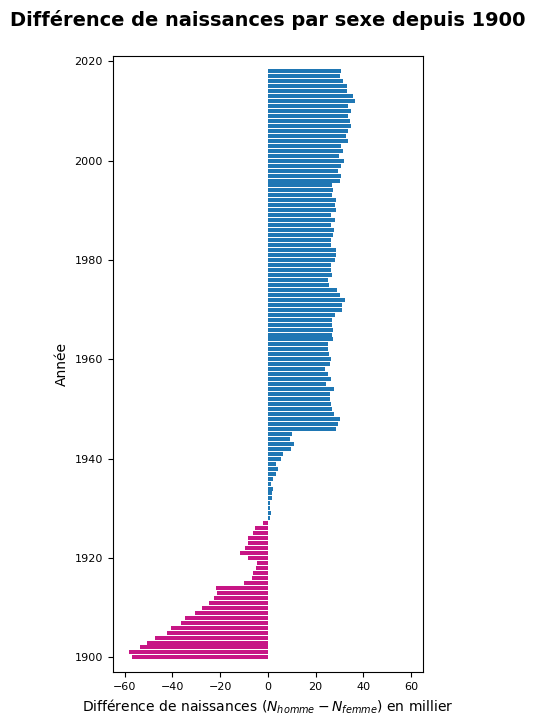

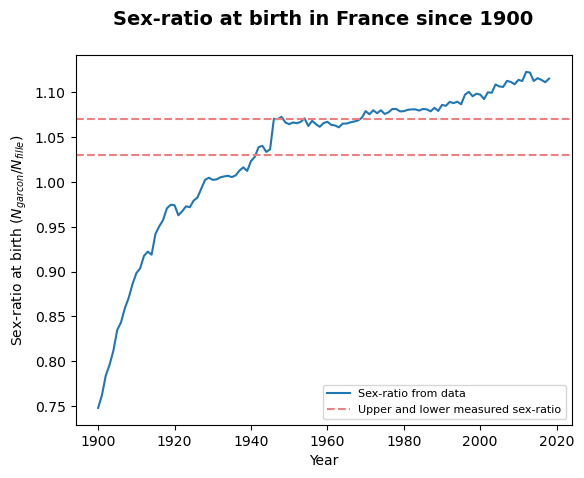

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,8))
diff_birth = df2[df2.sexe==1].nombre.values-df2[df2.sexe==2].nombre.values
mask_boy = diff_birth>0
mask_girl = diff_birth<=0
plt.barh(y=df2.annais.unique()[mask_boy], width=diff_birth[mask_boy]/1000)
plt.barh(y=df2.annais.unique()[mask_girl], width=diff_birth[mask_girl]/1000, color="mediumvioletred")
plt.xlabel("Différence de naissances ($N_{homme} - N_{femme}$) en millier", fontsize=10)
plt.ylabel("Année", fontsize=10)
plt.xlim((-65, 65))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim((1897, 2021))
plt.title("Différence de naissances par sexe depuis 1900\n", fontsize=14, fontweight="bold")
plt.show()

plt.figure()
plt.plot(df2.annais.unique(), df2[df2.sexe==1].nombre.values/df2[df2.sexe==2].nombre.values, label="Sex-ratio from data")
plt.axhline(1.03, linestyle='--', color='lightcoral', label="Upper and lower measured sex-ratio")
plt.axhline(1.07, linestyle='--', color='lightcoral')
plt.legend(loc='lower right',fontsize=8)
plt.title("Sex-ratio at birth in France since 1900\n", fontsize=14, fontweight="bold")
plt.ylabel("Sex-ratio at birth ($N_{garcon}/N_{fille}$)", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.show()

## Reproducing plots from the Figaro article

### Evolution of the name "Marie" over time

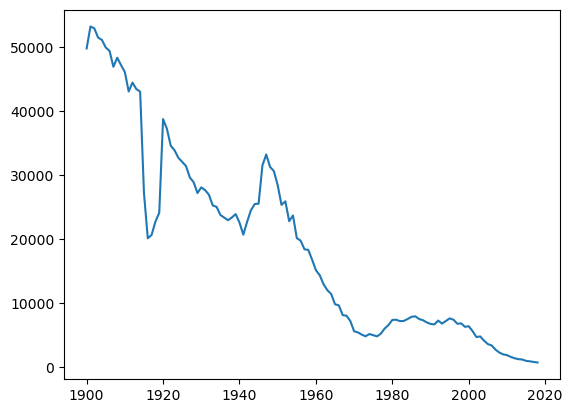

In [ ]:
df_marie = pd.DataFrame(df_fr[df_fr.preusuel=="MARIE"].groupby("annais", as_index=False).sum()[["annais", "nombre"]])
df_marie = df_marie.astype({'annais' : 'int'})

plt.plot(df_marie.annais, df_marie.nombre)
plt.ylim((0.75, 1.25))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Sex-ratio at birth in France since 1900\n", fontsize=14, fontweight="bold")
plt.ylabel("Sex-ratio at birth ($N_{garcon}/N_{fille}$)", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.show()

In [ ]:
import numpy as np

# Getting Marie & co data
df_marieandco = pd.DataFrame(df_fr[df_fr.preusuel.str.contains('MARIE')].groupby(["annais", "preusuel"], as_index=False).sum()[["annais", "preusuel", "nombre"]])

# Bubble plot setup
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

#### Marie and its derivates exclusively

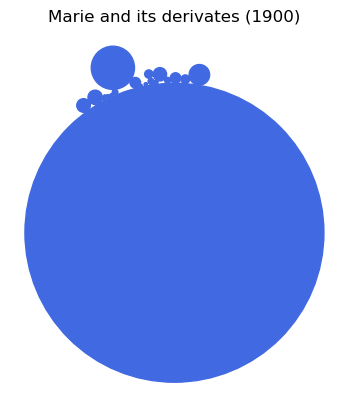

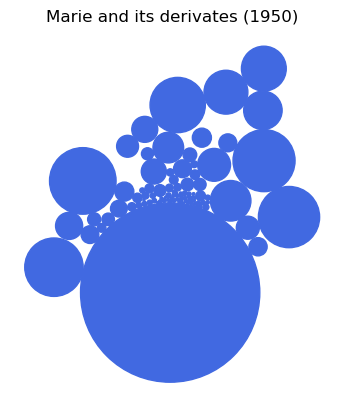

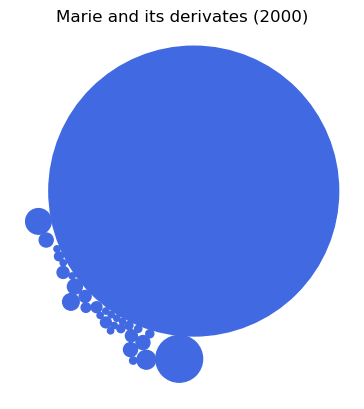

In [126]:
# Define the year
allyears = [1900, 1950, 2000]

for year in allyears:
    # Creating Bubble plot
    bubble_chart = BubbleChart(area = df_marieandco[df_marieandco.annais==str(year)].nombre, bubble_spacing=0)
    bubble_chart.collapse()

    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    bubble_chart.plot(
        ax, [""]*len(df_marieandco[df_marieandco.annais==str(year)].preusuel), colors=['royalblue']*len(df_marieandco[df_marieandco.annais==str(year)])
    )
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title(f"Marie and its derivates ({year})")
    plt.show()

In [ ]:
df_marieandco[df_marieandco.annais=='1900']

,annais,preusuel,nombre
0,1900,ANNE-MARIE,62
1,1900,JEAN-MARIE,99
2,1900,JEANNE-MARIE,8
3,1900,MARIE,49752
4,1900,MARIE-ANGE,6
5,1900,MARIE-ANNE,42
6,1900,MARIE-ANTOINETTE,61
7,1900,MARIE-EUGÉNIE,3
8,1900,MARIE-FRANÇOISE,20
9,1900,MARIE-JEANNE,114


In [ ]:
df_